# melのチェックを行う用のノートブック

In [ ]:
# ここに確認したいwavを配置.

input_wav_paths = ['./pre_voice/Universal/jsut_ver1.1_BASIC5000_0001.wav', './pre_voice/Universal/VCTK-Corpus_p257_256.wav']

p_config = './config/JSUT_JSSS/preprocess.yaml'

In [ ]:
# まずは, NARS2Sのほう.
import yaml

from utils.utils import get_mels, plot_mels

preprocess_config = yaml.load(
        open(p_config, "r", encoding='utf-8'), Loader=yaml.FullLoader
    )
mels = get_mels(wav_paths=input_wav_paths, config=preprocess_config, mel_num=80)

plot_mels(mels, input_wav_paths, sr=preprocess_config["preprocessing"]["audio"]["sampling_rate"], sharex=False)

In [ ]:
# hifiganのものでmelを作ってみる.
import os

from tqdm import tqdm
import torch

from hifigan.meldataset import load_wav, mel_spectrogram

mels = []

sr = preprocess_config["preprocessing"]["audio"]["sampling_rate"]
n_fft = preprocess_config["preprocessing"]["stft"]["filter_length"]
num_mels = preprocess_config["preprocessing"]["mel"]["n_mel_channels"]
hop_size = preprocess_config["preprocessing"]["stft"]["hop_length"]
win_size = preprocess_config["preprocessing"]["stft"]["win_length"]
fmin = preprocess_config["preprocessing"]["mel"]["mel_fmin"]
fmax = preprocess_config["preprocessing"]["mel"]["mel_fmax"]

for wav_path in tqdm(input_wav_paths):
    audio, sampling_rate = load_wav(wav_path, sr)
    assert sampling_rate == sr
    # audio = audio / 32768.0
    audio = torch.FloatTensor(audio).to("cuda")
    audio = audio.unsqueeze(0)

    mel = mel_spectrogram(audio, n_fft, num_mels, sr,
                            hop_size, win_size, fmin, fmax)
    mel = mel.squeeze(0).cpu().numpy()
    mels.append(mel)

plot_mels(mels, input_wav_paths, sr=sr, sharex=False)


In [ ]:
import shutil
import os
from glob import glob
from tqdm import tqdm

input_path = './raw_data/JSUT_JSSS/JSSS'
output_path = './raw_data/JSUT_to_from_JSSS/target'

os.makedirs(output_path, exist_ok=True)
for t_path in tqdm(glob(os.path.join(input_path,'*.wav'))):
    output_wav_path = os.path.join(output_path, "JSUT2JSSS_"+os.path.basename(t_path))
    shutil.copy(t_path, output_wav_path)

In [ ]:
import shutil
import os
from glob import glob
from tqdm import tqdm

input_path = './raw_data/JSUT_to_from_JSSS'

for t_path in tqdm(glob(os.path.join(input_path,'**/*.wav'), recursive=True)):
    output_wav_path = t_path
    if "JSSS2JSUT" in t_path:
        output_wav_path = output_wav_path.replace("JSSS2JSUT", "JSSS_JSUT")
    elif "JSUT2JSSS" in t_path:
        output_wav_path = output_wav_path.replace("JSUT2JSSS", "JSUT_JSSS")
    os.rename(t_path, output_wav_path)

In [30]:
# ちゃんと存在しているかチェック(さっきはしていなかった)
import glob
import os
import tqdm

s_wav_path = glob.glob('./pre_voice/jsut_jsss_jvs/source/*.wav')
t_wav_path = glob.glob('./pre_voice/jsut_jsss_jvs/target/*.wav')

for a, b in tqdm.tqdm(zip(s_wav_path, t_wav_path)):
    assert os.path.basename(a) == os.path.basename(b), print(a,b)

45258it [00:00, 109583.38it/s]


In [32]:
# ちゃんと存在しているかチェック(さっきはしていなかった)
import glob
import os
import tqdm

s_wav_path = glob.glob('./preprocessed_data/jsut_jsss_jvs/source/mel/*.npy')
t_wav_path = glob.glob('./preprocessed_data/jsut_jsss_jvs/target/mel/*.npy')

for a, b in tqdm.tqdm(zip(s_wav_path, t_wav_path)):
    assert os.path.basename(a) == os.path.basename(b), print(a,b)

9752it [00:00, 88253.51it/s]

./preprocessed_data/jsut_jsss_jvs/source/mel\mel-jvs009_jvs002_096.npy ./preprocessed_data/jsut_jsss_jvs/target/mel\mel-jvs009_jvs002_095.npy


AssertionError: None

In [43]:
from glob import glob
import os.path as opth

mel_paths_s = glob('./preprocessed_data/jsut_jsss_jvs/source/mel/*.npy')
mel_paths_t = glob('./preprocessed_data/jsut_jsss_jvs/target/mel/*.npy')

s_mel_base = set([opth.basename(path_) for path_ in mel_paths_s])
t_mel_base = set([opth.basename(path_) for path_ in mel_paths_t])

print(len(s_mel_base))
print(len(t_mel_base))
print(len(s_mel_base&t_mel_base))

s_mel_diff = s_mel_base - t_mel_base # surceから消したいもの
t_mel_diff = t_mel_base - s_mel_base # targetから消したいもの

for s_mel_path in s_mel_diff:
    os.remove('./preprocessed_data/jsut_jsss_jvs/source/mel/' + s_mel_path)
    base_name = s_mel_path.replace("mel-", "")

    os.remove('./preprocessed_data/jsut_jsss_jvs/source/energy/' + "energy-"+base_name)
    os.remove('./preprocessed_data/jsut_jsss_jvs/source/pitch/' + "pitch-"+base_name)

for t_mel_path in t_mel_diff:
    os.remove('./preprocessed_data/jsut_jsss_jvs/target/mel/' + t_mel_path)
    base_name = t_mel_path.replace("mel-", "")

    os.remove('./preprocessed_data/jsut_jsss_jvs/target/energy/' + "energy-"+base_name)
    os.remove('./preprocessed_data/jsut_jsss_jvs/target/pitch/' + "pitch-"+base_name)


45250
45250
45250


In [5]:
# ちゃんと存在しているかチェック(さっきはしていなかった)
import glob
import os
import tqdm
s_wav_path = glob.glob('./preprocessed_data/jsut_jsss_jvs/source/mel/*.npy')
t_wav_path = glob.glob('./preprocessed_data/jsut_jsss_jvs/target/mel/*.npy')

for a, b in tqdm.tqdm(zip(s_wav_path, t_wav_path)):
    assert os.path.basename(a) == os.path.basename(b), print(a,b)

s_wav_path = glob.glob('./preprocessed_data/jsut_jsss_jvs/source/energy/*.npy')
t_wav_path = glob.glob('./preprocessed_data/jsut_jsss_jvs/target/energy/*.npy')

for a, b in tqdm.tqdm(zip(s_wav_path, t_wav_path)):
    assert os.path.basename(a) == os.path.basename(b), print(a,b)

s_wav_path = glob.glob('./preprocessed_data/jsut_jsss_jvs/source/pitch/*.npy')
t_wav_path = glob.glob('./preprocessed_data/jsut_jsss_jvs/target/pitch/*.npy')

for a, b in tqdm.tqdm(zip(s_wav_path, t_wav_path)):
    assert os.path.basename(a) == os.path.basename(b), print(a,b)

0it [00:00, ?it/s]

219


NameError: name 'aaa' is not defined

In [48]:
import numpy as np 
from glob import glob

val_size = 1000
out_dir = "./preprocessed_data/jsut_jsss_jvs"

mel_paths_s = glob('./preprocessed_data/jsut_jsss_jvs/source/mel/*.npy')

out = []
speakers = []
for s_mel_path in mel_paths_s:
    s_mel_path = os.path.basename(s_mel_path).replace(".npy", "")
    base_name = s_mel_path.replace("mel-", "")
    out.append(base_name)
    speakers.append(base_name.split('_')[0])
    speakers.append(base_name.split('_')[1])

out = np.array(out)
index_ = np.random.permutation(len(out))
train_outs = out[index_[val_size:]]
valid_outs = out[index_[: val_size]]

for i, source_or_target in enumerate(["source", "target"]):
    # Write metadata
    with open(os.path.join(out_dir, source_or_target, "train.txt"), "w", encoding="utf-8") as f:
        for m in train_outs:
            f.write(m + "\n")
    with open(os.path.join(out_dir, source_or_target, "val.txt"), "w", encoding="utf-8") as f:
        for m in valid_outs:
            f.write(m + "\n")

assert train_outs[0][0] == train_outs[1][0]
assert valid_outs[0][0] == valid_outs[1][0]

speakers = set(speakers)
with open(os.path.join(out_dir, "speakers.txt"), "w", encoding="utf-8") as f:
    for speaker in speakers:
        f.write(speaker + '\n')
print("正しく想定したspeakersが記録されたか確認してください.")

正しく想定したspeakersが記録されたか確認してください.


In [24]:
# ないとは思うが, pitch, energy, mel, duration全てのshapeが一致しているかチェック.
# jvs006_jvs016_048.npyあかん
# jvs031_jvs016_048
# jvs055_jvs016_048
# jvs081_jvs016_048

from glob import glob 
import os 
import numpy as np
from tqdm import tqdm

duration_path = glob("./preprocessed_data/jsut_jsss_jvs/source/duration/*.npy")

for i, path_ in tqdm(enumerate(duration_path)):
    if i < 42100:
        continue
    basename = os.path.basename(path_).replace("duration-", "")
    if basename in ["jvs006_jvs016_048.npy", "jvs009_jvs002_095.npy", "jvs009_jvs058_095.npy", "jvs009_jvs064_095.npy", "jvs009_jvs098_095.npy", "jvs017_jvs009_095.npy", "jvs031_jvs016_048.npy", "jvs043_jvs009_095.npy", "jvs055_jvs016_048.npy", "jvs067_jvs009_095.npy", "jvs081_jvs016_048.npy", "jvs093_jvs009_095.npy"]:
        continue
    duration = np.load(path_)
    mel = np.load(os.path.join("./preprocessed_data/jsut_jsss_jvs/target/mel/", "mel-"+basename))
    energy = np.load(os.path.join("./preprocessed_data/jsut_jsss_jvs/target/energy/", "energy-"+basename))
    pitch = np.load(os.path.join("./preprocessed_data/jsut_jsss_jvs/target/pitch/", "pitch-"+basename))
    assert duration.sum() == mel.shape[0]
    assert duration.sum() == energy.shape[0]
    assert duration.sum() == pitch.shape[0], print(basename)


42155it [00:00, 329324.23it/s]

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

s = np.load("./preprocessed_data/N2C/source/pitch/pitch-n_c_beyond_tokkun-01.npy")
t = np.load("./preprocessed_data/N2C/target/pitch/pitch-n_c_beyond_tokkun-01.npy")

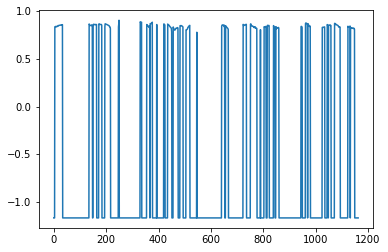

In [5]:
plt.plot(s)

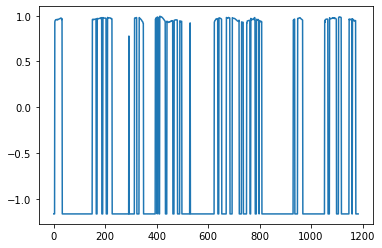

In [6]:
plt.plot(t)